# Student Result Prediction Project

Import Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


Import the csv file containg the Dataset

In [12]:
students_dataset=pd.read_csv("students_dataset.csv", sep=";")

# Data cleaning

1. Check if there are null values

In [13]:
students_dataset.apply(lambda x: sum(x.isnull()), axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Our dataset has no null values but if it had null values we would have performed this function

to fill in the null values with the mean of the column

~ eg. for Mjob(Mother's Job)
               
  students_dataset['Mjob'].apply(students_dataset['Mjob'].mean,inplace=True)           

Let us check the data types in our data set 

In [14]:
students_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# Model Planning

In [15]:
#let us check the first five records
students_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
#let us check the last five records
students_dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [18]:
#let us a column pass calculated from G1, G2 and G3

# IF THE SUM IS GREATER THAN 35 THEN THE STUDENTS HAS PASSED OTHERWISE HE/SHE HAS FAILED
students_dataset['pass']=students_dataset.apply(lambda row: 1 if (row['G1'] + row['G2'] + row['G3']) >= 35 else 0,axis=1 )

#Drop the columns G1, G2 and G3 after creating the pass column
students_dataset=students_dataset.drop(['G1','G2','G3'], axis=1)

#check the first five records to view what has just happened to the dataset
students_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [24]:
#Let  us Make all our code to be numeric since working with strings in a dataset is a pain in the neck
students_dataset=pd.get_dummies(students_dataset, columns=['sex','school','address','famsize','Pstatus','Mjob',
                                                                        'Fjob','reason','guardian','schoolsup','famsup','paid',
                                                                        'activities','nursery','higher','internet','romantic'])

#Now we have converted the data entries into Numbers
#Let us check the first five record to view our new dataset => Now our dataset has 57 columns and not 31 columns.
students_dataset.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


Let us prepare our dat for model building

1. We will shuffle the data in the dataset to create to avoid picking data in an organized way
2. Fetch training dataset
3. Fetch testing dataset

In [25]:
#shuffle the dataset
students_dataset=students_dataset.sample(frac=1)

#split the data in training data and testing data
students_dataset_training=students_dataset[:500]
students_dataset_testing=students_dataset[500:]


#Let us separate the x att to the y att in all the datasets
students_dataset_training_att= students_dataset_training.drop(["pass"],axis=1)
students_dataset_training_pass =students_dataset_training["pass"]

students_dataset_testing_att= students_dataset_testing.drop(["pass"],axis=1)
students_dataset_testing_pass =students_dataset_testing["pass"]

students_dataset_att= students_dataset.drop(["pass"],axis=1)
students_dataset_pass =students_dataset["pass"]

#check number of passing students in the whole dataset
print("Passing : %d out of %d (%.2f%%)" %(np.sum(students_dataset_pass),len(students_dataset_pass), 100*float(np.sum(students_dataset_pass)/len(students_dataset_pass))))


Passing : 328 out of 649 (50.54%)


# Model Building

[Text(2483.5227272727275, 4077.0, 'failures <= 0.5\nsamples = 100.0%\nvalue = [0.49, 0.51]\nclass = pass'),
 Text(1162.5, 3171.0, 'higher_yes <= 0.5\nsamples = 84.6%\nvalue = [0.411, 0.589]\nclass = pass'),
 Text(422.72727272727275, 2265.0, 'reason_other <= 0.5\nsamples = 4.2%\nvalue = [0.952, 0.048]\nclass = fail'),
 Text(211.36363636363637, 1359.0, 'samples = 3.8%\nvalue = [1.0, 0.0]\nclass = fail'),
 Text(634.0909090909091, 1359.0, 'romantic_no <= 0.5\nsamples = 0.4%\nvalue = [0.5, 0.5]\nclass = fail'),
 Text(422.72727272727275, 453.0, 'samples = 0.2%\nvalue = [1.0, 0.0]\nclass = fail'),
 Text(845.4545454545455, 453.0, 'samples = 0.2%\nvalue = [0.0, 1.0]\nclass = pass'),
 Text(1902.2727272727275, 2265.0, 'school_GP <= 0.5\nsamples = 80.4%\nvalue = [0.383, 0.617]\nclass = pass'),
 Text(1479.5454545454545, 1359.0, 'guardian_mother <= 0.5\nsamples = 23.6%\nvalue = [0.568, 0.432]\nclass = fail'),
 Text(1268.1818181818182, 453.0, 'samples = 7.6%\nvalue = [0.368, 0.632]\nclass = pass'),
 

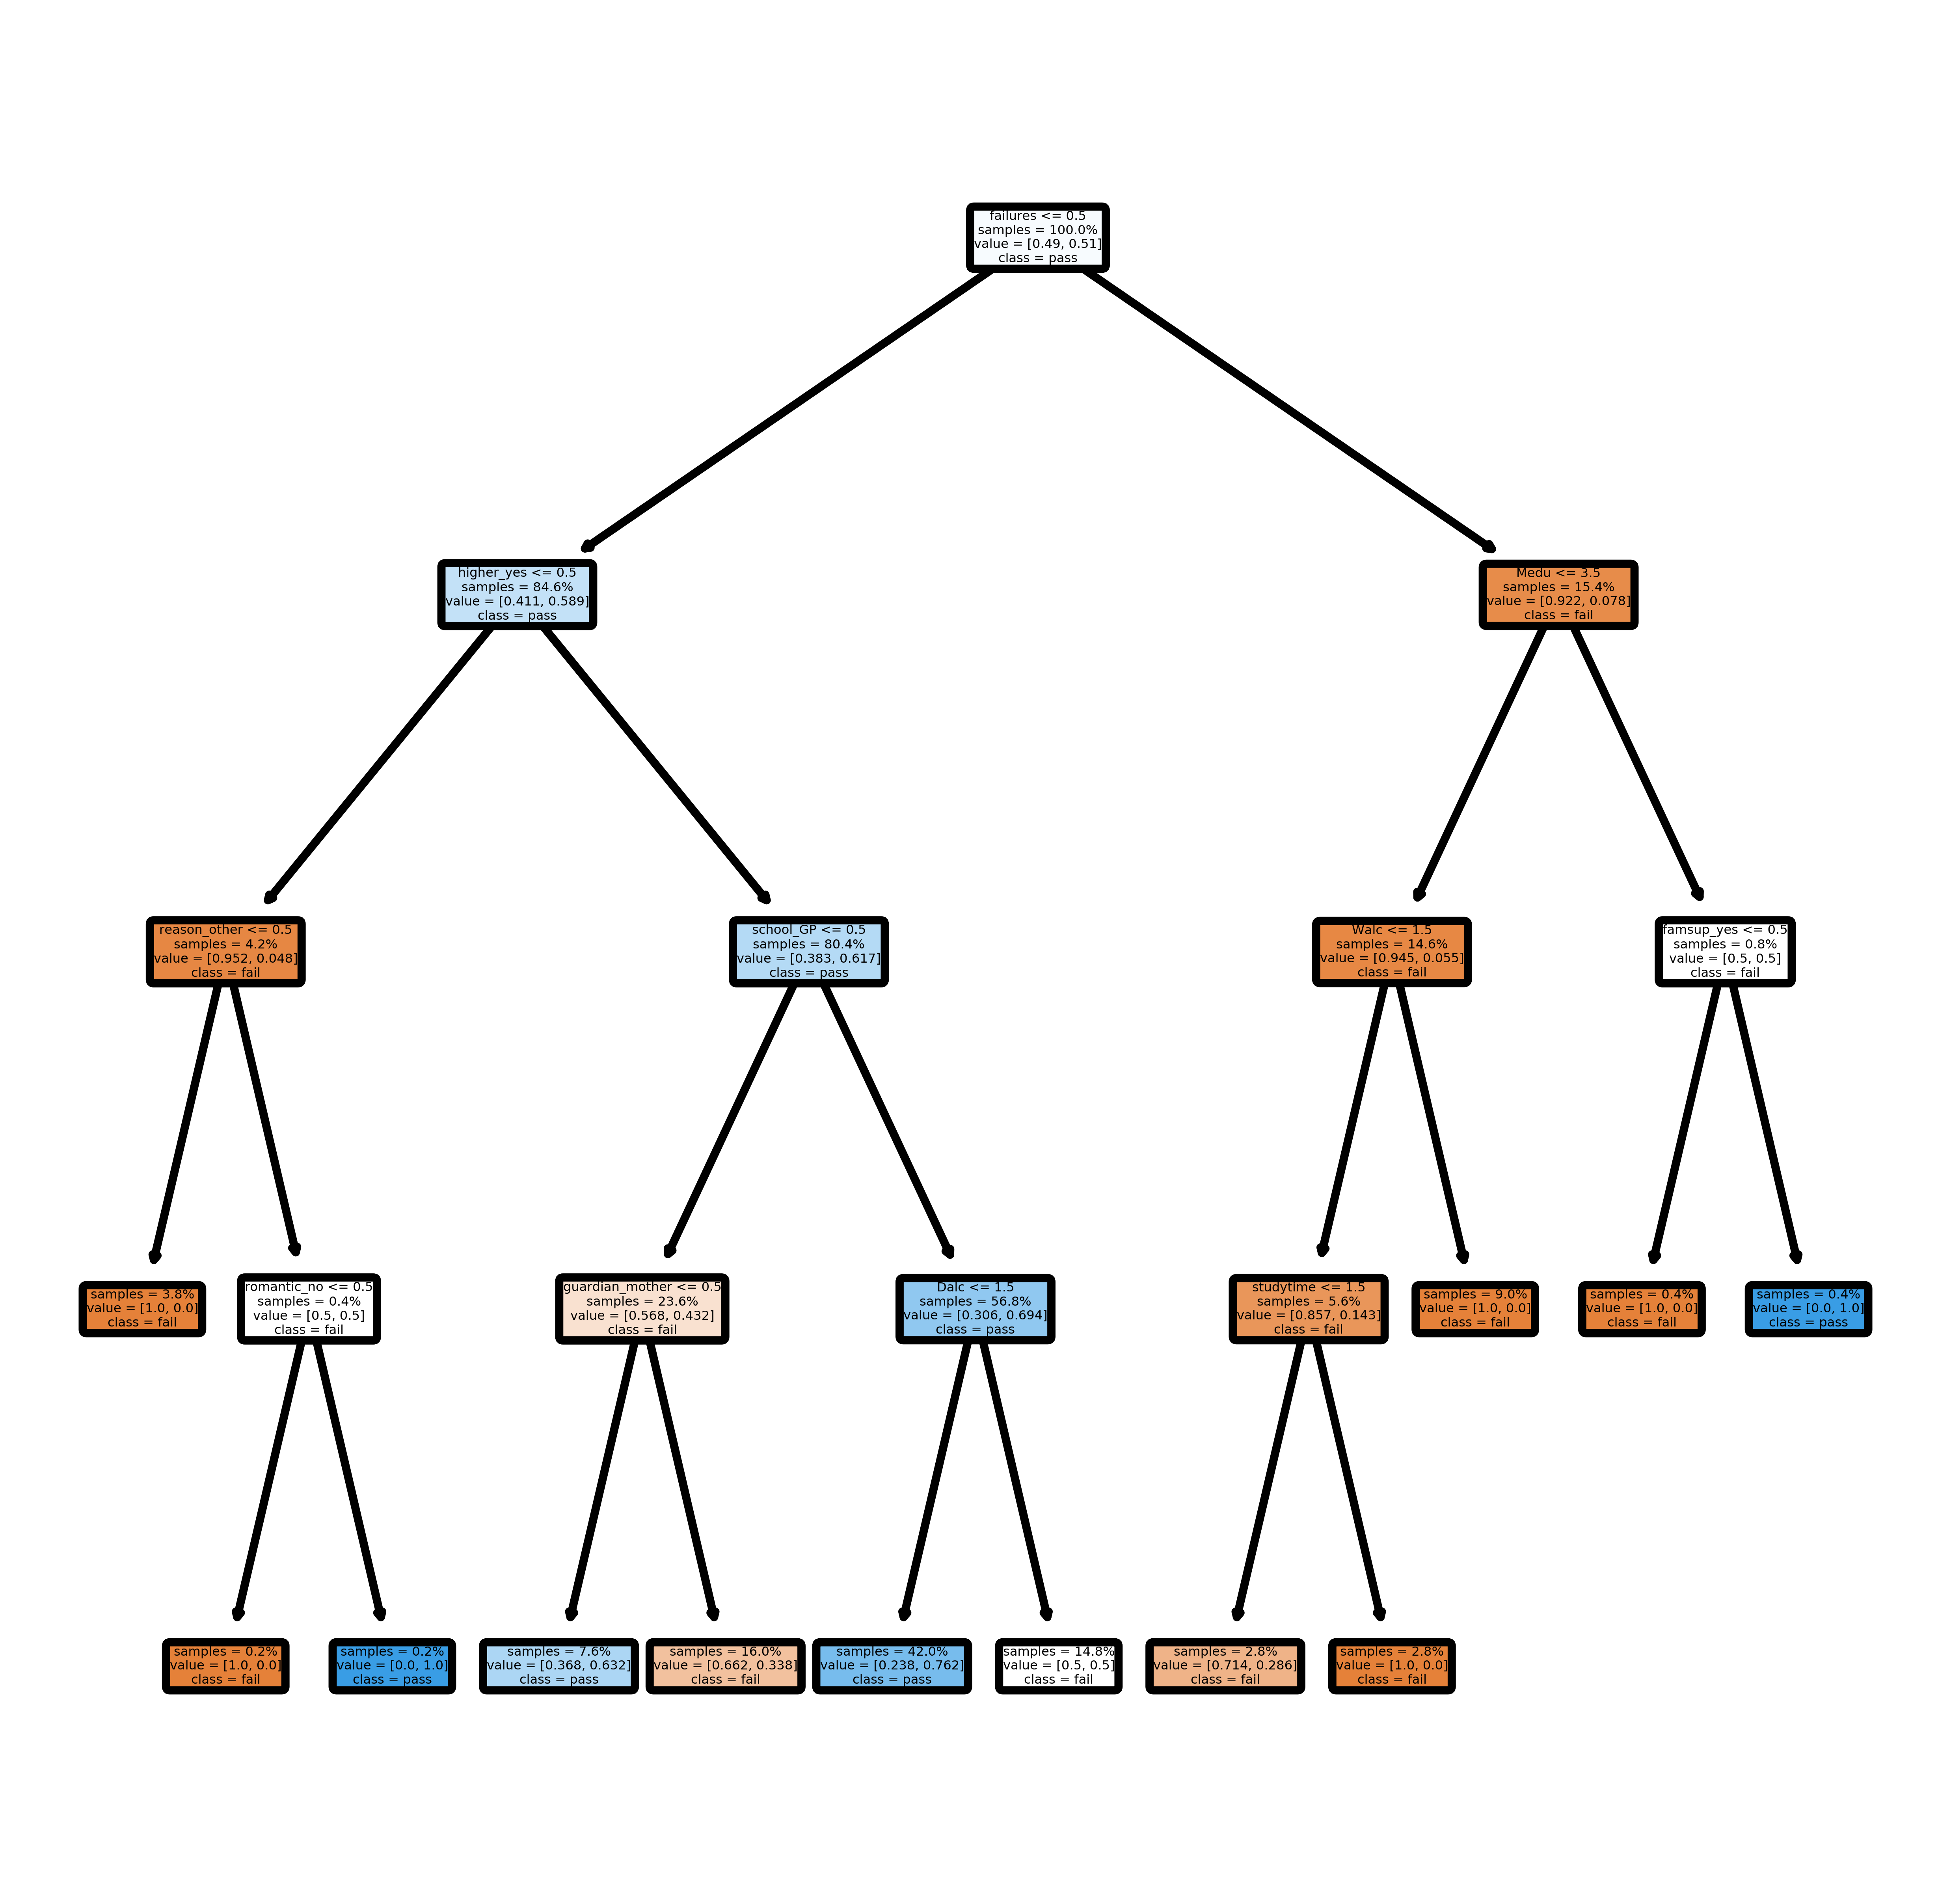

In [75]:
#Let create our model
from sklearn import tree
t=tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
t=t.fit(students_dataset_training_att,students_dataset_training_pass)

students_att=list(students_dataset_training_att)
students_class_names=["fail","pass"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1500)

#let us visualize our tree to our project folder
tree.plot_tree(t,label="all",impurity=False,proportion=True,
                    feature_names=students_att,class_names=students_class_names,
                    filled=True,rounded=True)


In [76]:
#check the accuracy of our model using the test data => our dataset is 63% accurate
t.score(students_dataset_testing_att,students_dataset_testing_pass)

0.6308724832214765

In [77]:
#Let us perform a cross validation on the entire dataset to see if the model is well trained
#cross validation only cross check is what we have done using the training and testing dataset is valid

from sklearn.model_selection import cross_val_score
scores=cross_val_score(t,students_dataset_att,students_dataset_pass,cv=5)

#show averaege score and +/- two standard deviation away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(),scores.std()*2))


Accuracy: 0.69 (+/- 0.03)


In [78]:
#Let us see how we can improve our model
for max_depth in range(1,20):
    t=tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores=cross_val_score(t,students_dataset_att,students_dataset_pass,cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" %(max_depth,scores.mean(),scores.std()*2))

Max depth: 1, Accuracy: 0.64 (+/- 0.03)
Max depth: 2, Accuracy: 0.69 (+/- 0.05)
Max depth: 3, Accuracy: 0.69 (+/- 0.04)
Max depth: 4, Accuracy: 0.69 (+/- 0.03)
Max depth: 5, Accuracy: 0.69 (+/- 0.03)
Max depth: 6, Accuracy: 0.67 (+/- 0.02)
Max depth: 7, Accuracy: 0.68 (+/- 0.03)
Max depth: 8, Accuracy: 0.68 (+/- 0.05)
Max depth: 9, Accuracy: 0.66 (+/- 0.05)
Max depth: 10, Accuracy: 0.65 (+/- 0.04)
Max depth: 11, Accuracy: 0.67 (+/- 0.04)
Max depth: 12, Accuracy: 0.67 (+/- 0.03)
Max depth: 13, Accuracy: 0.64 (+/- 0.06)
Max depth: 14, Accuracy: 0.65 (+/- 0.05)
Max depth: 15, Accuracy: 0.64 (+/- 0.05)
Max depth: 16, Accuracy: 0.65 (+/- 0.06)
Max depth: 17, Accuracy: 0.66 (+/- 0.05)
Max depth: 18, Accuracy: 0.65 (+/- 0.05)
Max depth: 19, Accuracy: 0.64 (+/- 0.04)


In [79]:
#data for creating a graph


depth_acc = np.empty((19,3),float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
    scores = cross_val_score(t,students_dataset_att,students_dataset_pass,cv=5)
    depth_acc[i,0]=max_depth
    depth_acc[i,1]=scores.mean()
    depth_acc[i,2]=scores.std()*2
    i+= 1
    
depth_acc

array([[ 1.        ,  0.63788909,  0.03289211],
       [ 2.        ,  0.68570066,  0.05019244],
       [ 3.        ,  0.68877758,  0.0411983 ],
       [ 4.        ,  0.69340489,  0.02858361],
       [ 5.        ,  0.69025641,  0.03282051],
       [ 6.        ,  0.67488372,  0.02035725],
       [ 7.        ,  0.69189028,  0.05210173],
       [ 8.        ,  0.66401908,  0.06390875],
       [ 9.        ,  0.65635063,  0.03630313],
       [10.        ,  0.67024448,  0.03621871],
       [11.        ,  0.66104949,  0.07286977],
       [12.        ,  0.66722719,  0.04476558],
       [13.        ,  0.6487418 ,  0.04477784],
       [14.        ,  0.65488372,  0.05717679],
       [15.        ,  0.65338104,  0.04688912],
       [16.        ,  0.64412642,  0.05820811],
       [17.        ,  0.65794872,  0.02782494],
       [18.        ,  0.64409064,  0.05973999],
       [19.        ,  0.64254025,  0.04146467]])

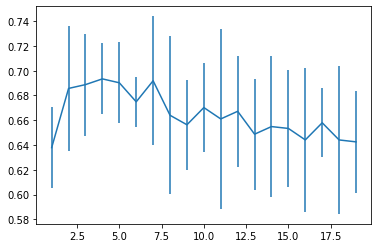

In [80]:
#let us plot an error bar to display the level of accuracy when using different max_depth
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0],depth_acc[:,1],yerr=depth_acc[:,2])
plt.show()

# From this error bar we can conclude that for this dataset we only arround 4 questions to achieve a maximum accuracy.